# Python libraries for data science 
CMTC / IVV NWZ Mini-Symposium Data Science Technologies 2022

# About me

![jonathan.jpeg](/user/j_rada01/files/Vortrag%20symposium/img/jonathan.jpeg)
Jonathan Radas


- JupyterHub @ WWU IT
- PhD Student @ CVMLS 
- Together with Jonathan Wandscheer holding the Python lecture

# About Python

# Who do we need packages?





Besides the obvious reasons, that we don't want to start from scratch every time

Python was initially developed for teaching and prototyping and was not designed for fast execution speed

- Python use interpreter (slow)
- Compiled languages like C are usually a lot faster


### Solution: For performance critical code use C
- That's why we have numpy and neural networks implemented in python

# Python package

> Packages are a way of structuring Python’s module namespace

                                            Python Documentation 



- Python compiles files in modules and caches them
- Dependencies can be added in `setup.py`

## Using pip

## Using conda

![conda](https://upload.wikimedia.org/wikipedia/commons/e/ea/Conda_logo.svg)

Conda provides many of the features found in:
- pip
- virtualenv
- venv
- pyenv

- Pip does not resolve dependency conflicts. Dependency  hell might be relevant for you and easy to solve (its np complete) 
- Pip encourages to use environments

https://research.swtch.com/version-sat 

Conda packages can not only include Python libraries  but also:
- other libraries  (e.g. libjpeg, cuda)
- executables like the python interpreter

--> the installation of multiple python versions is possible.

# Pip vs Conda 

| &nbsp;                     | pip              | Conda           |
|----------------------------|------------------|-----------------|
| Installs Python            | No               | Yes, as package |
| 3rd-party shared libraries | Inside the wheel | Yes, as package |
| Executables and tools      | No               | Yes, as package |
| Python source code         | Yes, as package  | Yes, as package |



adapted from: https://pythonspeed.com/articles/conda-vs-pip/

# Pypi vs Conda Forge

| **&nbsp;**                   | **PyPI**                      | **Conda-Forge** |
|------------------------------|-------------------------------|-----------------|
| Who creates package?         | Author of code                | Anyone          |
| Build infrastructure         | Maintained by author          | Centralized     |
| Open source Python libraries | Essentially all               | Many            |
| Windows/Linux/macOS packages | Usually, but up to maintainer | Almost always   |


adapted from: https://pythonspeed.com/articles/conda-vs-pip/

## Mamba

![mamba](https://raw.githubusercontent.com/mamba-org/mamba/master/docs/assets/mamba_header.png)

- To make things worse: in recent times another package manager emerged Mamba 
- It can be used as a drop-in replacement for conda

- **Main feature**:
    Faster dependency resolver (in large environments by a magnitude)

# Numpy

- Brings higher performance  in NUMerical computation to PYthon by using C and Fortran

- Brings matlab features to python

The basic and most important building block in numpy is the ndarray
- n-dimensional Array. 
- used with the alias `np.array`
- only one datatype allowed
- thus, every element has a fixed size

## Examples

In [33]:
import numpy as np
arr = np.array([1,2,3])
arr.dtype

dtype('int64')

Simple creation of arrays:

In [2]:
v = np.arange(20)
w = np.zeros(10)
x = np.random.rand(5)
print(v)
print(w)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.857529   0.341528   0.09271964 0.16947018 0.10953903]


You can easily repeat array and use boolean indexing

In [34]:
arr = np.random.rand(10)*10
index = [True, False, True, False, True]*2
print(arr[index])



[8.91881139 5.73545322 2.21160845 7.4423326  9.29973203 5.47199677]


and use boolean indexing for filtering

In [37]:
print(arr)
print(arr[np.greater_equal(arr, 8)])

[8.91881139 7.79270044 5.73545322 7.67823064 2.21160845 7.4423326
 4.59630484 9.29973203 2.11437025 5.47199677]
[8.91881139 9.29973203]


One of the advantages are the broadcasting and vectorization

In [40]:
arr = np.random.rand(10)*10
f = lambda x: x + 5
print(f(9.33))

14.33


In [42]:
F = np.vectorize(f, otypes=[float])
print(arr)
print(F(arr))

[4.58747156 4.77383805 2.60017676 0.22434548 6.53606881 1.17532633
 2.65605049 2.78544108 4.37270619 3.68969219]
[ 9.58747156  9.77383805  7.60017676  5.22434548 11.53606881  6.17532633
  7.65605049  7.78544108  9.37270619  8.68969219]


# Pandas

In [7]:
import pandas as pd


- numpy is a very general purpose library
- pandas is built for data analysis, and the name obviously comes from "panel data"
- this is reflected in the two central data types you might know from other software solutions:
    - Series
    - DataFrame

## Series
- a Panda Series is a 1-dimensional array with labels
- when a series is created from a numpy array, the labels are equal to the index of the underlying array
- but the labels can also contain other information
- of particular interest is timestamped data, where the label contains timestamps

## Dataframe

- a dataframe is a 2-dimensional labeled array
- this is actually just a fancy name for a table
- each column is a series

In [44]:
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

## Another example: vaccinations

In [45]:
# Data source: Our World in Data 
vaccination_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccinations = pd.read_csv(vaccination_url)

In [46]:
vaccinations.tail()

location iso_code        date  total_vaccinations  people_vaccinated  \
129703  Zimbabwe      ZWE  2022-09-04                 NaN                NaN   
129704  Zimbabwe      ZWE  2022-09-05                 NaN                NaN   
129705  Zimbabwe      ZWE  2022-09-06                 NaN                NaN   
129706  Zimbabwe      ZWE  2022-09-07                 NaN                NaN   
129707  Zimbabwe      ZWE  2022-09-08          12161598.0          6416614.0   

        people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
129703                      NaN             NaN                     NaN   
129704                      NaN             NaN                     NaN   
129705                      NaN             NaN                     NaN   
129706                      NaN             NaN                     NaN   
129707                4730503.0       1014481.0                     NaN   

        daily_vaccinations  total_vaccinations_per_hundred  \
129703              1334.0                             NaN   
129704              1334.0                             NaN   
129705              1334.0                             NaN   
129706              1334.0                             NaN   
129707              1334.0                           76.04   

        people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
129703                            NaN                                  NaN   
129704                            NaN                                  NaN   
129705                            NaN                                  NaN   
129706                            NaN                                  NaN   
129707                          40.12                                29.58   

        total_boosters_per_hundred  daily_vaccinations_per_million  \
129703                         NaN                            83.0   
129704                         NaN                            83.0   
129705                         NaN                            83.0   
129706                         NaN                            83.0   
129707                        6.34                            83.0   

        daily_people_vaccinated  daily_people_vaccinated_per_hundred  
129703                    467.0                                0.003  
129704                    467.0                                0.003  
129705                    467.0                                0.003  
129706                    467.0                                0.003  
129707                    467.0                                0.003

In [47]:
vax_germany = vaccinations[vaccinations["location"]== "Germany"]
vax_germany.tail()

location iso_code        date  total_vaccinations  people_vaccinated  \
44064  Germany      DEU  2022-09-22         185343501.0         64780300.0   
44065  Germany      DEU  2022-09-23         185385437.0         64780926.0   
44066  Germany      DEU  2022-09-24         185394396.0         64781246.0   
44067  Germany      DEU  2022-09-25         185398839.0         64781382.0   
44068  Germany      DEU  2022-09-26         185424361.0         64781994.0   

       people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
44064               63458093.0      59399217.0                 58258.0   
44065               63459128.0      59439492.0                 41936.0   
44066               63459656.0      59447603.0                  8959.0   
44067               63459837.0      59451729.0                  4443.0   
44068               63460490.0      59475986.0                 25522.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
44064             33201.0                          222.21   
44065             33501.0                          222.26   
44066             33312.0                          222.27   
44067             33496.0                          222.28   
44068             34114.0                          222.31   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
44064                          77.67                                76.08   
44065                          77.67                                76.08   
44066                          77.67                                76.08   
44067                          77.67                                76.08   
44068                          77.67                                76.08   

       total_boosters_per_hundred  daily_vaccinations_per_million  \
44064                       71.21                           398.0   
44065                       71.26                           402.0   
44066                       71.27                           399.0   
44067                       71.28                           402.0   
44068                       71.31                           409.0   

       daily_people_vaccinated  daily_people_vaccinated_per_hundred  
44064                    549.0                                0.001  
44065                    530.0                                0.001  
44066                    535.0                                0.001  
44067                    541.0                                0.001  
44068                    549.0                                0.001

With pandas, as in every pipeline, you need some data cleaning

In [49]:
vax_germany = vax_germany.astype({'total_vaccinations': pd.Int32Dtype(), 'people_vaccinated': pd.Int32Dtype(),	'people_fully_vaccinated': pd.Int32Dtype(),	'total_boosters':pd.Int32Dtype(),	'daily_vaccinations_raw': pd.Int32Dtype(),	'daily_vaccinations': pd.Int32Dtype() })
vax_germany.date = pd.to_datetime(vax_germany.date)
vax_germany.set_index("date") # does not work, since the object is unchanged and a new object is returned
vax_germany = vax_germany.set_index("date")

# You can also directly plot with pandas

<AxesSubplot: xlabel='date'>

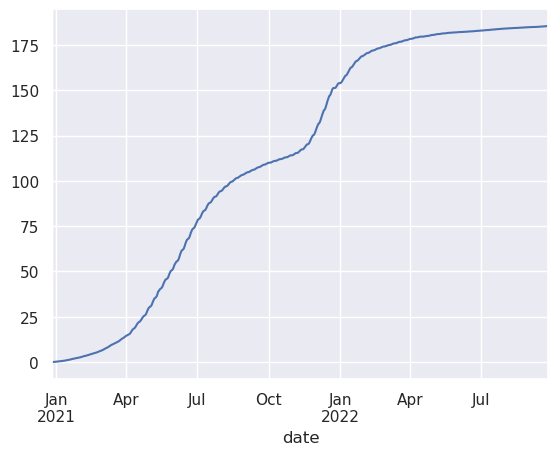

In [50]:
(vax_germany.total_vaccinations/1000000).plot() # number in Millions

Python & Pandas makes many things easy, inlcuding working with dates

In [51]:
import calendar
import matplotlib.pyplot as plt

Text(0, 0.5, 'Vaccinations')

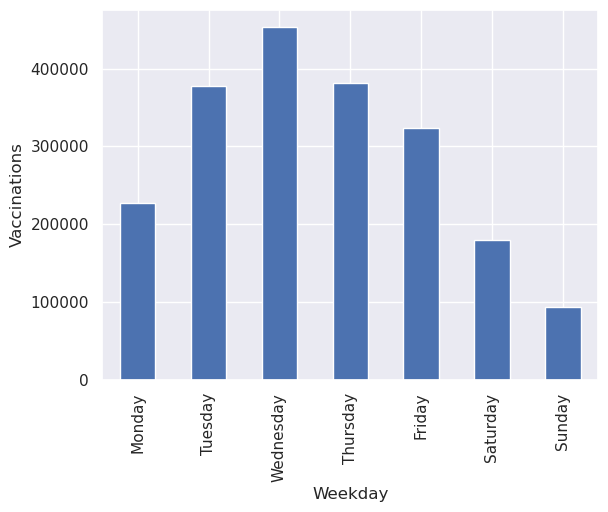

In [52]:
vax_weekday = vax_germany.groupby(vax_germany.index.dayofweek).mean(numeric_only=True)
axes = vax_weekday.daily_vaccinations_raw.plot(kind="bar")
axes.set_xticklabels(calendar.day_name)
plt.xlabel("Weekday")
plt.ylabel("Vaccinations")

# polars

- Alternative to pandas
- Polars uses apache arrow instead of numpy arrays
- Written in Rust

In [16]:
pip install polars

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import polars as pl

## The creation of dataframes is very similar to pandas

In [54]:
df = pl.DataFrame(
     {
        "A": [1, 2, 3, 4, 5],
        "fruits": ["banana", "banana", "apple", "apple", "banana"],
        "B": [5, 4, 3, 2, 1],
        "cars": ["beetle", "audi", "beetle", "beetle", "beetle"],
     }
)

In [18]:
df

shape: (5, 4)
┌─────┬────────┬─────┬────────┐
│ A   ┆ fruits ┆ B   ┆ cars   │
│ --- ┆ ---    ┆ --- ┆ ---    │
│ i64 ┆ str    ┆ i64 ┆ str    │
╞═════╪════════╪═════╪════════╡
│ 1   ┆ banana ┆ 5   ┆ beetle │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ 2   ┆ banana ┆ 4   ┆ audi   │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ 3   ┆ apple  ┆ 3   ┆ beetle │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ 4   ┆ apple  ┆ 2   ┆ beetle │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┤
│ 5   ┆ banana ┆ 1   ┆ beetle │
└─────┴────────┴─────┴────────┘

To prepare the next step, we write the vaccination pandas-df to a csv-file

In [55]:
vaccinations.to_csv("path.csv")

##  Lazy Evaluation is one of the key features of polars
This allows polars to optimize execution, e.g. only load the needed rows and columns.

`.describe_optimized_plan()` prints the optimized plan

In [56]:
plan = pl.scan_csv("path.csv") \
    .filter(pl.col("iso_code") == "DEU") \
    .with_columns([
        (pl.col("total_vaccinations") / (pl.col(  "total_vaccinations_per_hundred") /100  )).alias("population"),
    ]) \
    .select(["location","population"])
plan

You can look at the execution plan:

In [57]:
print(plan.describe_optimized_plan() )

  FastProjection { columns: ["location", "population"] }
     WITH_COLUMNS:
     [[(col("total_vaccinations")) / ([(col("total_vaccinations_per_hundred")) / (100f64)])].alias("population")]
      CSV SCAN path.csv; PROJECT 4/17 COLUMNS; SELECTION: Some([(col("iso_code")) == (Utf8(DEU))])



In [58]:
plan.collect() # .fetch() only runs on first lines

shape: (639, 2)
┌──────────┬────────────┐
│ location ┆ population │
│ ---      ┆ ---        │
│ str      ┆ f64        │
╞══════════╪════════════╡
│ Germany  ┆ 8.143e7    │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.4872e7   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.4092e7   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.2415e7   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...      ┆ ...        │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.3409e7   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.3410e7   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.3408e7   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Germany  ┆ 8.3408e7   │
└──────────┴────────────┘

 # Benchmarks by H20
 ![alt text](https://h2oai.github.io/db-benchmark/join/J1_1e8_NA_0_0_basic.png "Benchmark")

# Matplotlib
Almost every detail of the plot can be manipulated. The very good documentation also helps with this: 
https://matplotlib.org/stable/tutorials/introductory/usage.htm
![Matplotlib Erklärung](https://matplotlib.org/stable/_images/anatomy.png)

# Seaborn

Seaborn is a high level API for matplotlib. Its a declarative API is simpler and easier to understand.

In [24]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [59]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Simple Customizations are easier than in Matplotlib, but less flexible


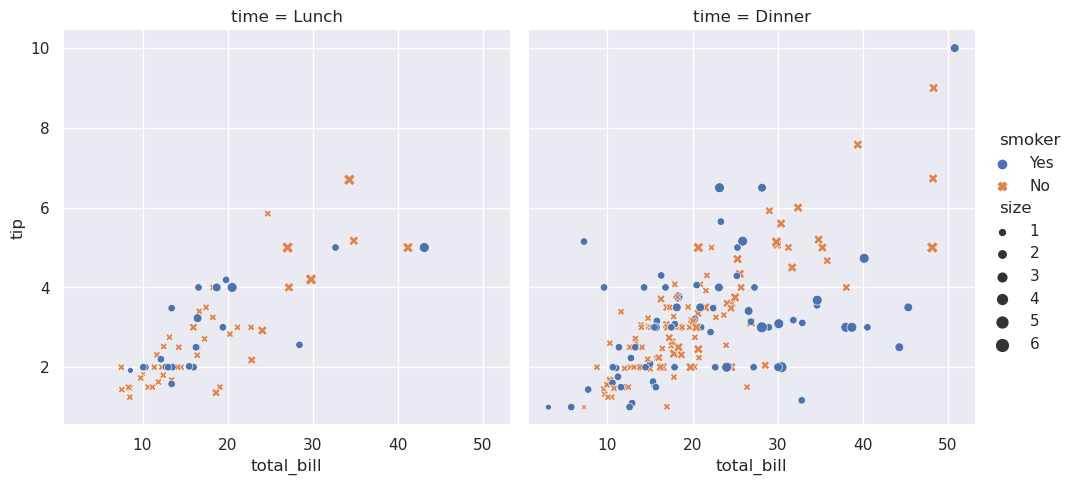

In [60]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

Even simple linear models with confidence interval are possible

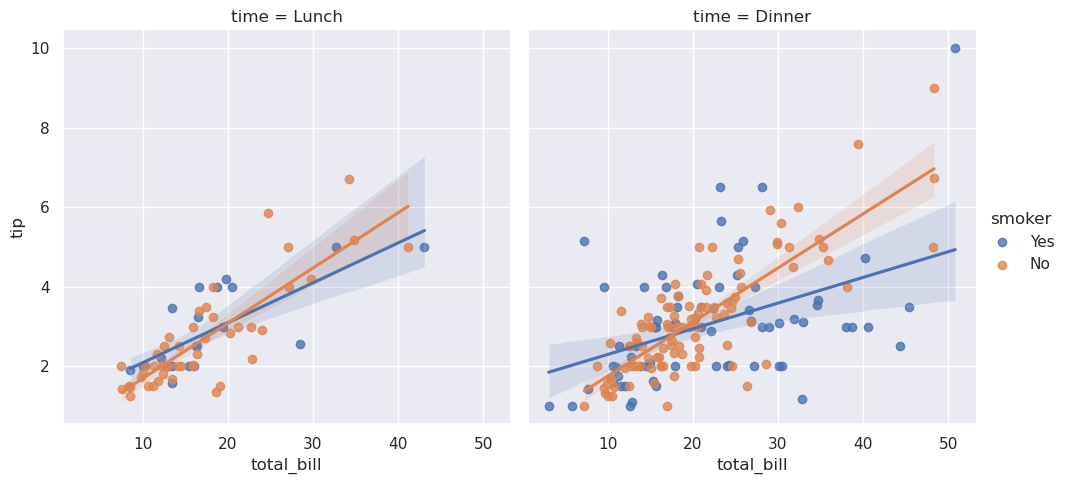

In [62]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", ci=90)

# Autoviz

In [28]:
pip install autoviz --upgrade

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [42]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.55. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [ ]:
filename = "path.csv"
dft = AV.AutoViz(
    filename,
    verbose=1,
    chart_format="html",
)

Shape of your Data Set loaded: (129203, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...


    17 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
No scatter plots with depVar when no depVar is given.
Saving pair_scatters in HTML format


# Tensorflow and Tensorboard

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [63]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Load the packages

In [64]:
import tensorflow as tf
import datetime

In [65]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [66]:
%tensorboard --logdir logs/fit

### Load the dataset

In [67]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

### Create the model

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

2022-09-28 10:54:49.725902: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Create a CNN

In [70]:
image_shape = (28,28,1) 

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
    
])

train_images = train_images.reshape(train_images.shape[0],*image_shape)
test_images = test_images.reshape(test_images.shape[0],*image_shape)

## Compile the model & train

In [71]:
model = cnn_model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=train_images, 
          y=train_labels, 
          epochs=20, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback])

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4306 - accuracy: 0.8487 - val_loss: 0.3273 - val_accuracy: 0.8841
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3055 - accuracy: 0.8913 - val_loss: 0.3100 - val_accuracy: 0.8890
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2699 - accuracy: 0.9036 - val_loss: 0.2780 - val_accuracy: 0.8994
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2456 - accuracy: 0.9109 - val_loss: 0.2743 - val_accuracy: 0.9005
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2268 - accuracy: 0.9185 - val_loss: 0.2684 - val_accuracy: 0.9055
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2098 - accuracy: 0.9237 - val_loss: 0.2558 - val_accuracy: 0.9081
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1934 - accuracy: 0.9286 - val_loss: 0.2510 - val_ac

# Make prediction
To make predictions we need to add a Softmax layer to the model

In [83]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [84]:
predictions = probability_model.predict(train_images)

1875/1875 [==============================] - 3s 1ms/step


The result of the softmax layer is a probability distribution over all classes

In [85]:
predictions[0]

array([0.08547653, 0.08547653, 0.08547653, 0.08547653, 0.08547653,
       0.08547676, 0.08547658, 0.08644682, 0.08547653, 0.22974065],
      dtype=float32)

To get the predicted class, we can take the argmax

In [86]:
np.argmax(predictions[0])

9

In [87]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

We can also visualize the examples

In [88]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [89]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Tensorflow vs. Keras vs. Pytorch

- **Tensorflow** is the oldest and first framework to really get mainstream attention.
- Tensorflow is sometimes hard to work with, therefore **Keras** gained popularity. 
- **Pytorch** is a new approach, without the technical dept from tensorflow


#### IMHO

In terms of simplicity:
Keras > Pytorch > Tensorflow

Pytorch gives more control since the lower-level features are easier accessible

In the end, its all just a tool.

# Profiler

In [72]:
%%prun -s cumulative -q -l 10 -T prun0

# We profile the cell, sort the report by "cumulative
# time", limit it to 10 lines, and save it to a file
# named "prun0".

n = 100000
iterations = 20

arr = np.random.randint(0, 1e9, size=(iterations, n))
for elem in arr:
    sorted = np.sort(elem)
    print(sorted[0])


1896
37902
11335
4811
6993
2167
3884
5767
8143
3659
1267
16243
2793
1821
16140
7176
16758
1711
3864
18834
 
*** Profile printout saved to text file 'prun0'. 


In [91]:
print(open('prun0', 'r').read())

         461 function calls in 0.136 seconds

   Ordered by: cumulative time
   List reduced from 35 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.136    0.136 {built-in method builtins.exec}
        1    0.000    0.000    0.136    0.136 <string>:5(<module>)
       21    0.000    0.000    0.121    0.006 {built-in method numpy.core._multiarray_umath.implement_array_function}
       20    0.000    0.000    0.121    0.006 <__array_function__ internals>:177(sort)
       20    0.000    0.000    0.121    0.006 fromnumeric.py:852(sort)
       20    0.119    0.006    0.119    0.006 {method 'sort' of 'numpy.ndarray' objects}
        1    0.015    0.015    0.015    0.015 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
       20    0.001    0.000    0.001    0.000 {method 'copy' of 'numpy.ndarray' objects}
       20    0.000    0.000    0.000    0.000 {built-in method builtins.print}
       4

# Jupyter

For explorative analysis, you can use the JupyterHub provided by the University:
    
[jupyterhub.wwu.de](https://jupyterhub.wwu.de/)

We (and other lecturers) also use it for teaching.

# RISE
Used for this presentation  :)

# Further Packages

# In Standard 
- Profiler
- timeit
- ipthon


# Basic 
- numpy
- pandas
- polars



# Vizualisation
- matplotlib
- plotly/dash
- seaborn

# Learning
- scikit learn
- keras
- pytorch
- opencv
- hugging faces



# Webdevelopment
- flask
- sqlalchemy
- requests

# Packagemanager and enviroments
- pip
- conda
- mamba
- virtualenv
- Cython


# Discussion and Questions
### Whats your favorite python package?